# Initial setup

In [1]:
#importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#importing data
test_data = pd.read_table('test_rows.csv')
train_data = pd.read_table('train_rows.csv')
label_data = pd.read_table('test_rows_labels.csv')

# EDA
## Let's see how clean the data is.

### Train data

In [2]:
train_data_stats = train_data.describe()

In [3]:
train_data_stats

RPA2_3    ZYG11A_4        F5_2     HOXC4_1   NKIRAS2_2     MEIS1_1  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean    63.089567   17.512548   38.266587   46.263413   24.298221   43.974471   
std      7.595446    5.927233    6.271039    9.117746    4.192553   14.295283   
min     43.780000    6.290000   23.580000   23.280000   12.070000   12.760000   
25%     57.772500   13.257500   33.322500   39.392500   21.580000   33.810000   
50%     62.980000   17.435000   37.985000   45.370000   24.100000   44.900000   
75%     68.335000   21.022500   42.935000   53.232500   27.225000   53.210000   
max     83.190000   40.820000   52.120000   69.470000   37.340000   79.270000   

         SAMD10_2      GRM2_9    TRIM59_5      LDB2_3    ELOVL2_6       DDO_1  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean    34.801154   42.726875   44.744279   56.083654   56.316538   48.226058   
std      6.073039   16.877749    8.248182   10.150657   10.932166   14.544547   
min     18.220000    7.310000   25.260000   31.940000   31.830000   14.770000   
25%     30.450000   29.285000   38.807500   48.732500   47.652500   38.922500   
50%     34.635000   42.945000   44.410000   56.185000   57.110000   47.685000   
75%     39.540000   56.040000   51.557500   62.750000   64.917500   57.192500   
max     47.140000   81.170000   69.960000   78.730000   77.160000   88.090000   

          KLF14_2         Age  
count  208.000000  208.000000  
mean     3.003654   43.500000  
std      1.740971   15.044539  
min      0.480000   18.000000  
25%      1.687500   30.750000  
50%      2.525000   43.500000  
75%      4.020000   56.250000  
max      8.750000   69.000000

<AxesSubplot:>

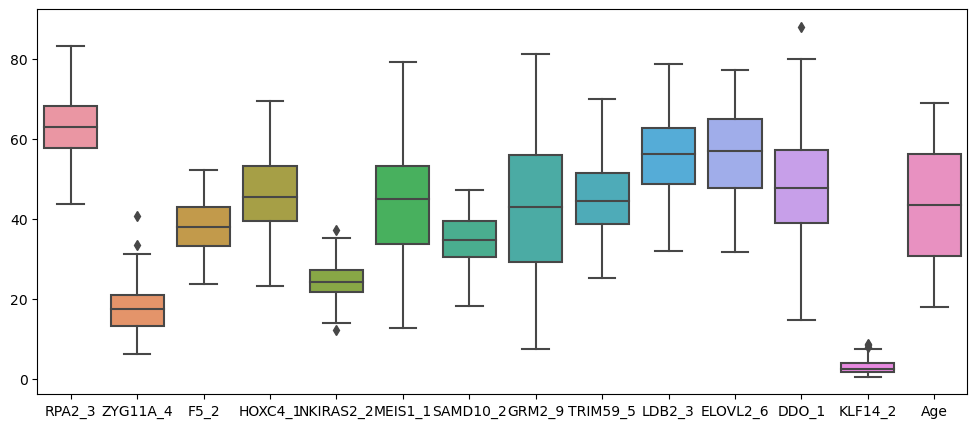

In [4]:
plt.figure(figsize = (12, 5))
sns.boxplot(data = train_data)

From the boxplot analysis, there are several outliers that can be detected in the results of **ZYG11A_4, NKRAS2_2, DDO_1, KLF14_2**. 

### Maybe we can scatter them out to see if we can remove those outliers

<AxesSubplot:xlabel='Age', ylabel='KLF14_2'>

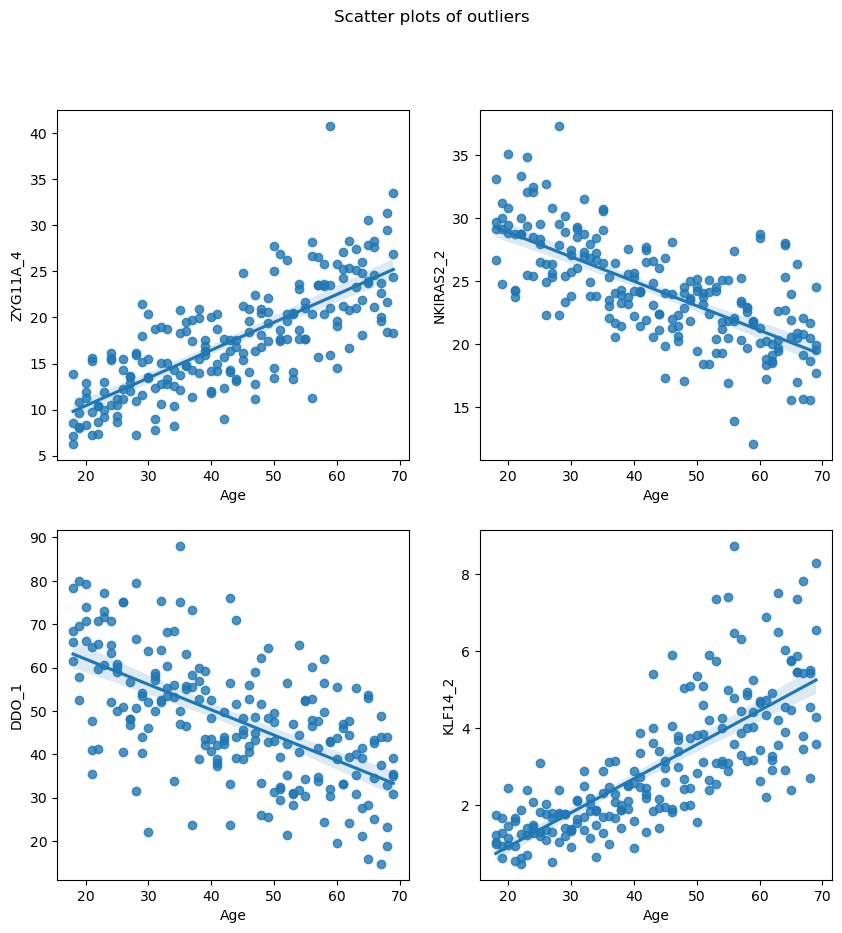

In [5]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle("Scatter plots of outliers")

sns.regplot(ax = axes[0, 0], data = train_data, y = 'ZYG11A_4', x = 'Age')
sns.regplot(ax = axes[0, 1], data = train_data, y = 'NKIRAS2_2', x = 'Age')
sns.regplot(ax = axes[1, 0], data = train_data, y = 'DDO_1', x = 'Age')
sns.regplot(ax = axes[1, 1], data = train_data, y = 'KLF14_2', x = 'Age')

It seems like it is quite hard to determine solely on a scatterplot (except for **ZYG11A_4**). Let's figure it out stastically with IQR (Inter Quartile Range) - the good old trusted method

### IQR = Quartile3 - Quartile1

In [6]:
def calculate_iqr(gene):
    q3 = train_data[gene].quantile(0.75)
    q1 = train_data[gene].quantile(0.25)
    iqr = q3 - q1
    return iqr

IQR_ZYG11A_4 = calculate_iqr('ZYG11A_4')
IQR_NKIRAS2_2 = calculate_iqr('NKIRAS2_2')
IQR_DDO_1 = calculate_iqr('DDO_1')
IQR_KLF14_2 = calculate_iqr('KLF14_2')

def remove_outlier(dframe, gene, iqr):
    df_final = dframe.drop(index = np.where(dframe[gene]>=(dframe[gene].quantile(0.75)+1.5*iqr))[0], inplace = True)
    df_final = dframe.drop(index = np.where(dframe[gene]<=(dframe[gene].quantile(0.25)-1.5*iqr))[0], inplace = True)
    return df_final

remove_outlier(train_data, 'ZYG11A_4', IQR_ZYG11A_4)
remove_outlier(train_data, 'NKIRAS2_2', IQR_NKIRAS2_2)
remove_outlier(train_data, 'DDO_1', IQR_DDO_1)
remove_outlier(train_data, 'KLF14_2', IQR_KLF14_2)

Let's see if it works...

<AxesSubplot:xlabel='Age', ylabel='KLF14_2'>

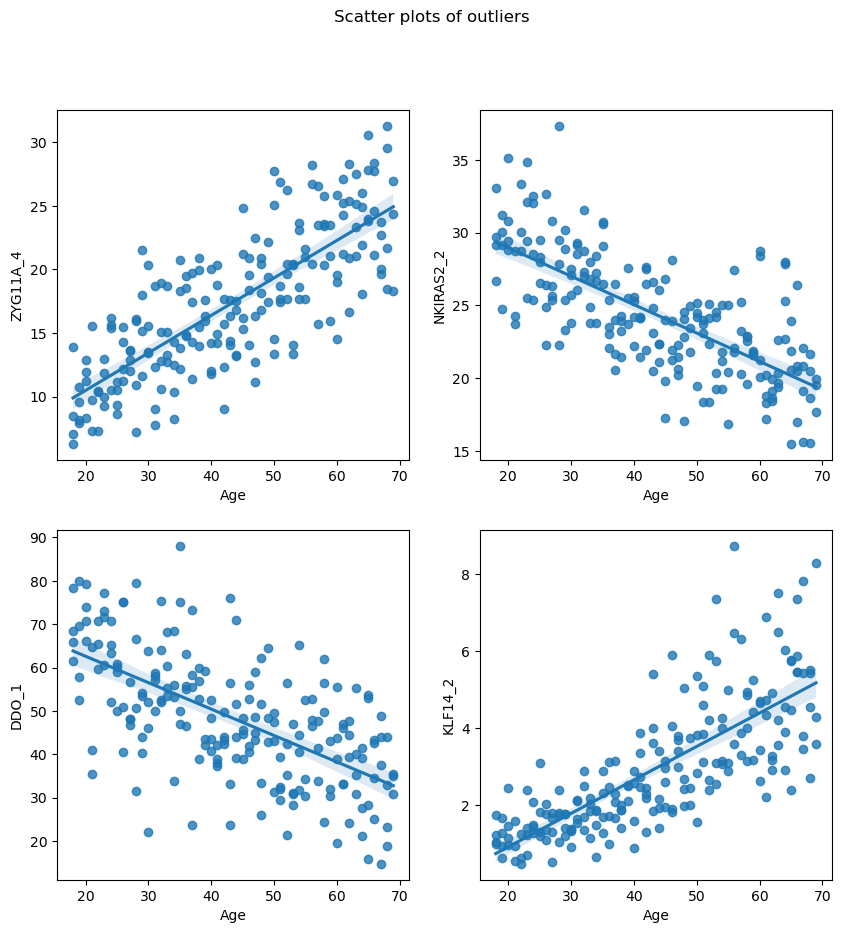

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))
fig.suptitle("Scatter plots of outliers")

sns.regplot(ax = axes[0, 0], data = train_data, y = 'ZYG11A_4', x = 'Age')
sns.regplot(ax = axes[0, 1], data = train_data, y = 'NKIRAS2_2', x = 'Age')
sns.regplot(ax = axes[1, 0], data = train_data, y = 'DDO_1', x = 'Age')
sns.regplot(ax = axes[1, 1], data = train_data, y = 'KLF14_2', x = 'Age')

### Let's check for the distribution of these gene expression levels

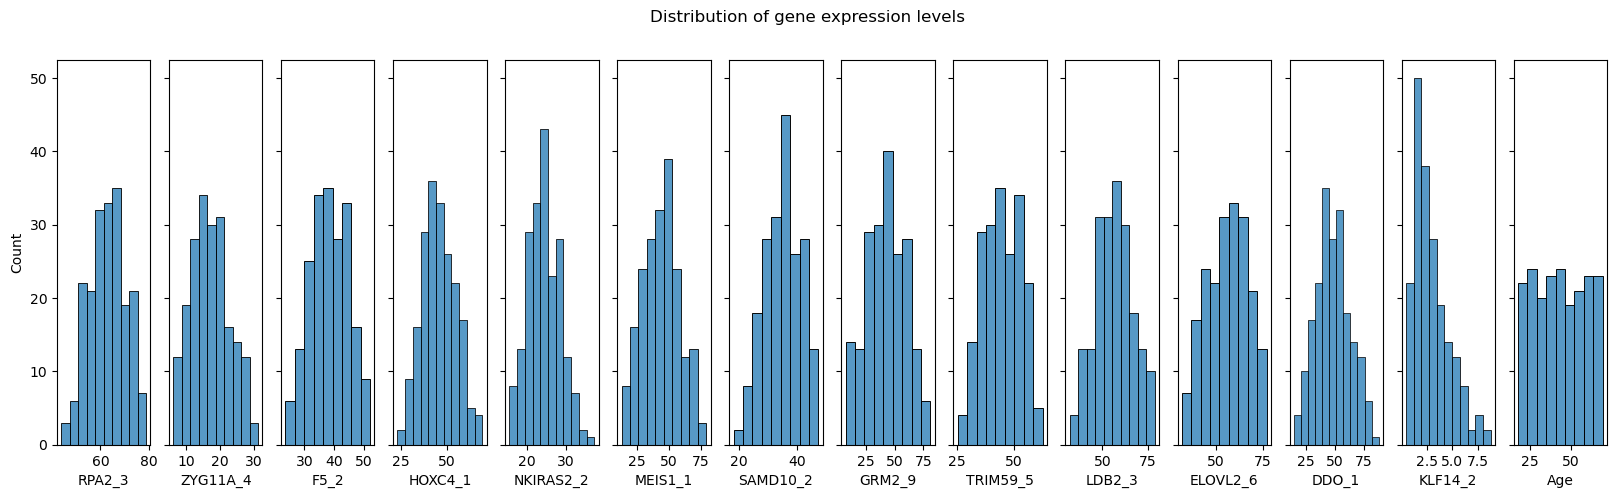

In [8]:
fig, axes = plt.subplots(1, 14, figsize = (20, 5), sharey = True)
fig.suptitle("Distribution of gene expression levels")

plot_num = 0
for x in train_data.columns:
    sns.histplot(ax = axes[plot_num], data = train_data[x])
    plot_num += 1

### Any missing values?

In [9]:
train_data.isnull().sum()

RPA2_3       0
ZYG11A_4     0
F5_2         0
HOXC4_1      0
NKIRAS2_2    0
MEIS1_1      0
SAMD10_2     0
GRM2_9       0
TRIM59_5     0
LDB2_3       0
ELOVL2_6     0
DDO_1        0
KLF14_2      0
Age          0
dtype: int64

### Great!!

However, we can see that not normal distributions are not common in this dataset. This is expected as the sample size is quite small. We will see if this train data can fit the models well.

### Correlation matrix of gene expression levels with Ages

<AxesSubplot:>

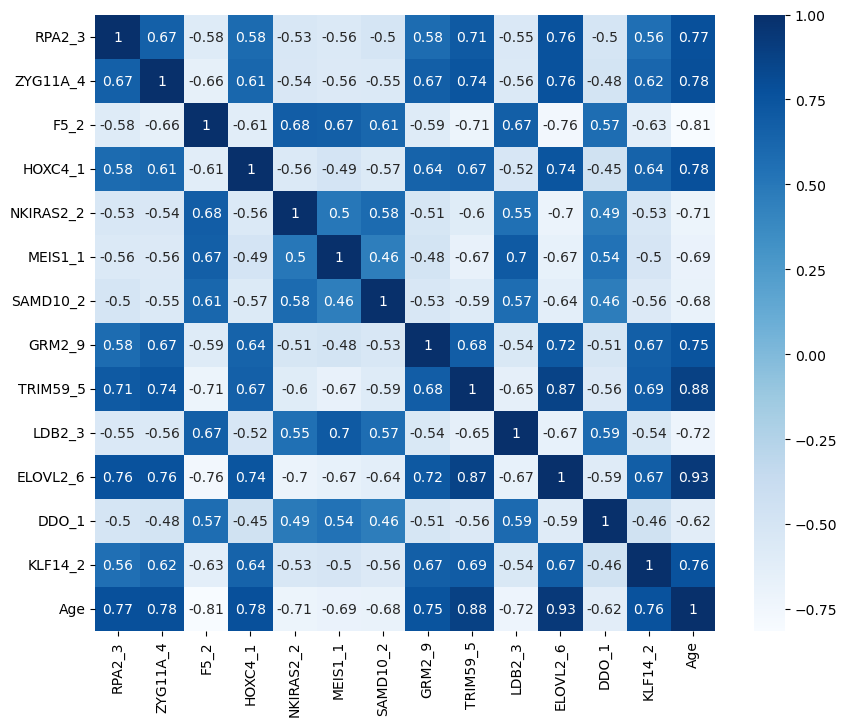

In [10]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "Blues")

From this we can see that there are several genes with high correlation to ages (over 0.75), including: **RPA2_3, ZYG11A_4, HOXC4_1, GRM2_9, TRIM59_5, ELOVL2_6 (the highest), KLF14_2**

# MACHINE LEARNING TIME!!!

## OK, so this is a quite small sample size, with less than 20 parameters, so I am going hardcore and will deploy a Linear Regression model using sklearn.

In [11]:
x = train_data.drop(columns='Age')

In [12]:
y = train_data['Age']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
c = lr.intercept_
print(c)

4.221961272126187


In [18]:
m = lr.coef_
print(m)

[ 0.20663928  0.02088922 -0.31805401  0.21359958 -0.10925777 -0.03327137
 -0.07872086  0.00507462  0.32885662 -0.06516331  0.38393706 -0.03336611
  1.22388901]


In [19]:
y_pred_train = lr.predict(x_train)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.952513427727194

In [21]:
y_pred_test = lr.predict(x_test)

In [22]:
r2_score(y_test, y_pred_test)

0.9139256122687424

## Our model is performing rather well. So let's use it on the test dataset and predict the ages.

In [23]:
y_pred_new_test = lr.predict(test_data)

In [24]:
test_data['Predicted Age'] = y_pred_new_test

In [25]:
test_data

RPA2_3  ZYG11A_4   F5_2  HOXC4_1  NKIRAS2_2  MEIS1_1  SAMD10_2  GRM2_9  \
0     65.96     18.08  41.57    55.46      30.69    63.42     40.86   68.88   
1     66.83     20.27  40.55    49.67      29.53    30.47     37.73   53.30   
2     50.30     11.74  40.17    33.85      23.39    58.83     38.84   35.08   
3     65.54     15.56  33.56    36.79      20.23    56.39     41.75   50.37   
4     59.01     14.38  41.95    30.30      24.99    54.40     37.38   30.35   
..      ...       ...    ...      ...        ...      ...       ...     ...   
99    58.69     18.35  44.93    47.38      28.52    27.93     36.91   38.85   
100   63.83     12.09  41.90    44.60      24.75    39.18     36.72   59.16   
101   74.61     24.72  31.47    56.47      27.28    20.12     29.83   65.22   
102   66.44     20.96  34.99    55.25      23.77    49.99     36.05   73.52   
103   49.13     12.58  46.85    37.69      27.03    57.83     32.56   30.09   

     TRIM59_5  LDB2_3  ELOVL2_6  DDO_1  KLF14_2  Predicted Age  
0       44.32   56.17     62.29  40.99     2.30      44.801517  
1       50.09   58.40     61.10  49.73     1.07      45.003378  
2       35.90   58.81     50.38  63.03     0.95      28.298955  
3       41.46   58.05     50.58  62.13     1.99      37.790832  
4       31.28   65.80     48.74  41.88     0.90      26.933058  
..        ...     ...       ...    ...      ...            ...  
99      43.60   66.52     50.38  61.35     2.36      35.996982  
100     47.58   61.89     56.56  46.96     2.32      41.868329  
101     54.89   43.36     68.69  16.45     6.54      65.594717  
102     51.74   49.90     67.48  36.06     4.22      55.969581  
103     40.35   66.59     51.18  33.94     2.30      30.761434  

[104 rows x 14 columns]

### Questions to answer:

What genes are highly expressed in younger ages/older ages?

Let's define younger ages as 30 and below

<AxesSubplot:xlabel='Age', ylabel='KLF14_2'>

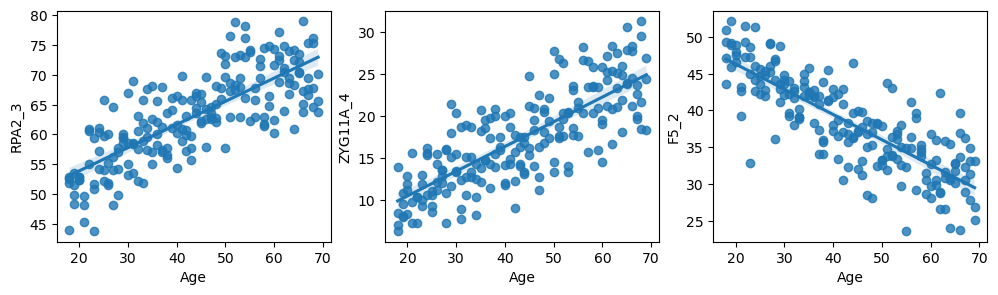

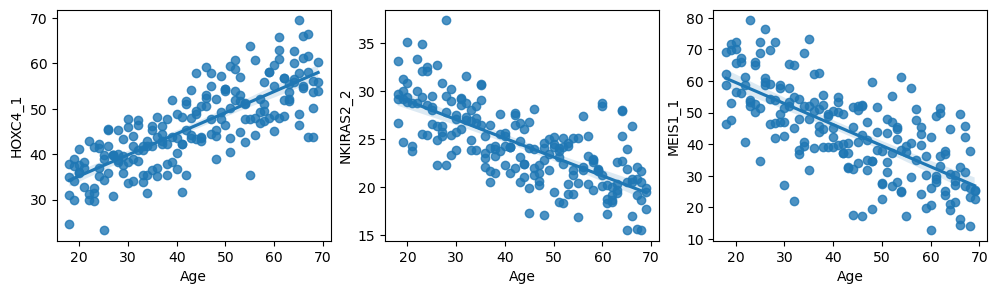

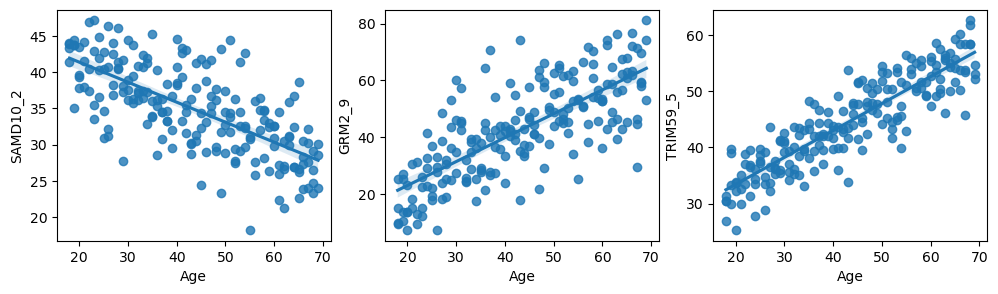

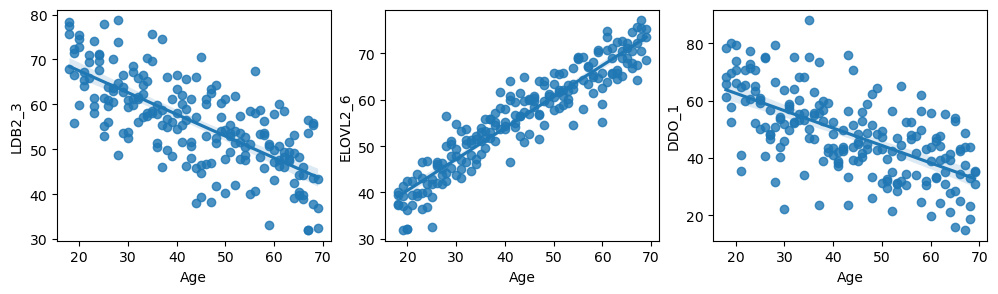

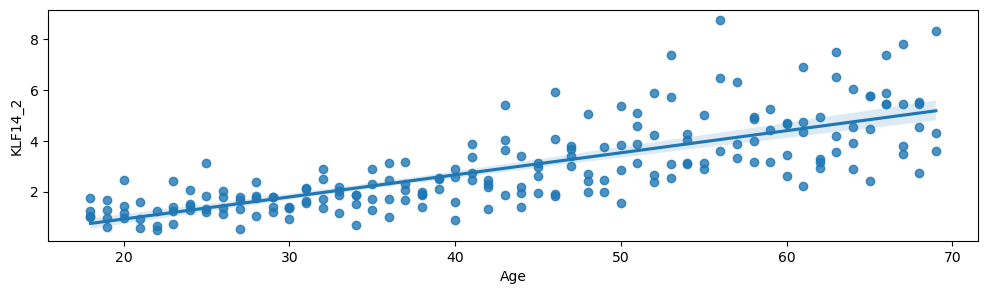

In [26]:
plt_num = 0
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
for gene in train_data.columns[0:3]:
    sns.regplot(ax = axes[plt_num], data = train_data, y = gene, x = 'Age')
    plt_num += 1

plt_num = 0
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
for gene in train_data.columns[3:6]:
    sns.regplot(ax = axes[plt_num], data = train_data, y = gene, x = 'Age')
    plt_num += 1
    
plt_num = 0
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
for gene in train_data.columns[6:9]:
    sns.regplot(ax = axes[plt_num], data = train_data, y = gene, x = 'Age')
    plt_num += 1

    
plt_num = 0
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
for gene in train_data.columns[9:12]:
    sns.regplot(ax = axes[plt_num], data = train_data, y = gene, x = 'Age')
    plt_num += 1

plt.figure(figsize = (12, 3))
sns.regplot(data = train_data, y = 'KLF14_2', x = 'Age')

## THANK YOU FOR READING!